# Titanic: Machine Learning from Disaster

## 1. Understanding the Problem

This is a classic binary classification problem:
- **Objective**: Predict which passengers survived the Titanic shipwreck
- **Target Variable**: Survived (0 = No, 1 = Yes)
- **Features**: Passenger attributes (class, sex, age, etc.)

We'll follow a complete machine learning workflow:
1. Data Exploration
2. Data Preprocessing and Feature Engineering
3. Model Building & Evaluation
4. Predictions & Submission


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [45]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

Set visualization style

In [47]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

### 1. Data Loading and Exploration

In [49]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

train.csv file's Shape

In [51]:
train_data.shape

(891, 12)

test.csv file's Shape

In [53]:
test_data.shape

(418, 11)

gender_submission.csv file's Shape

In [55]:
gender_submission.shape

(418, 2)

First few rows of the training data

In [57]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

First few rows of the testing data

In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [64]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Exploratory Data Analysis (EDA)

Overall survival rate

In [67]:
survival_rate = train_data['Survived'].mean() * 100
print(f"\nOverall survival rate: {survival_rate:.2f}%")


Overall survival rate: 38.38%


Survival by gender

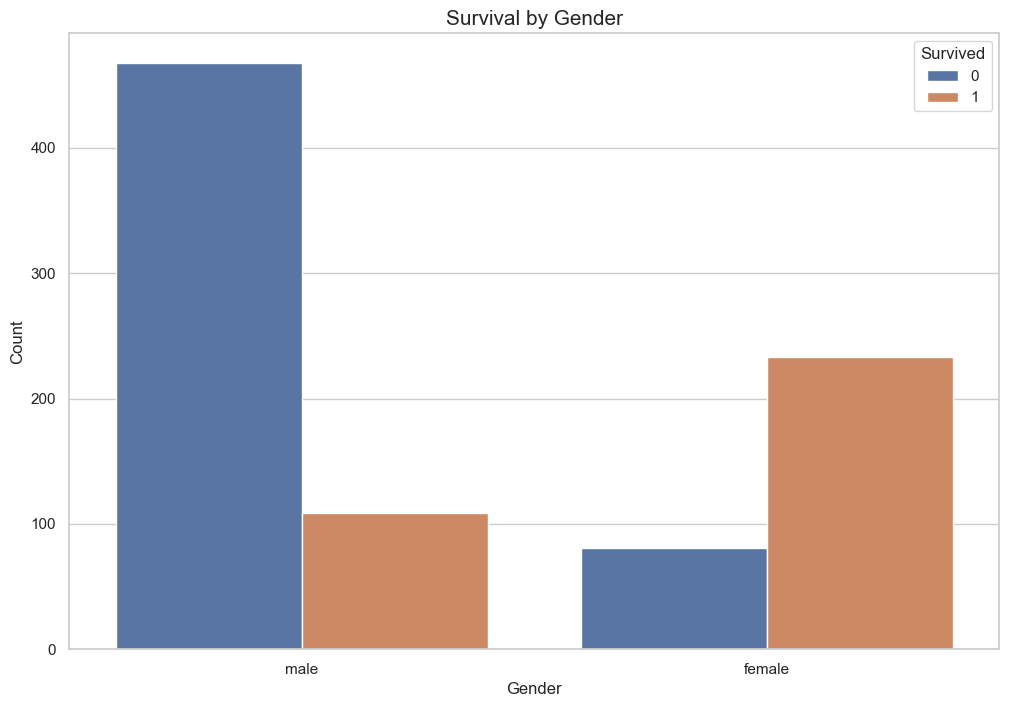

In [69]:
plt.figure()
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('figures/survival_by_gender.png')
plt.show()

Calculate survival rates by gender

In [71]:
gender_survival = train_data.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rates by gender:")
print(gender_survival)


Survival rates by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


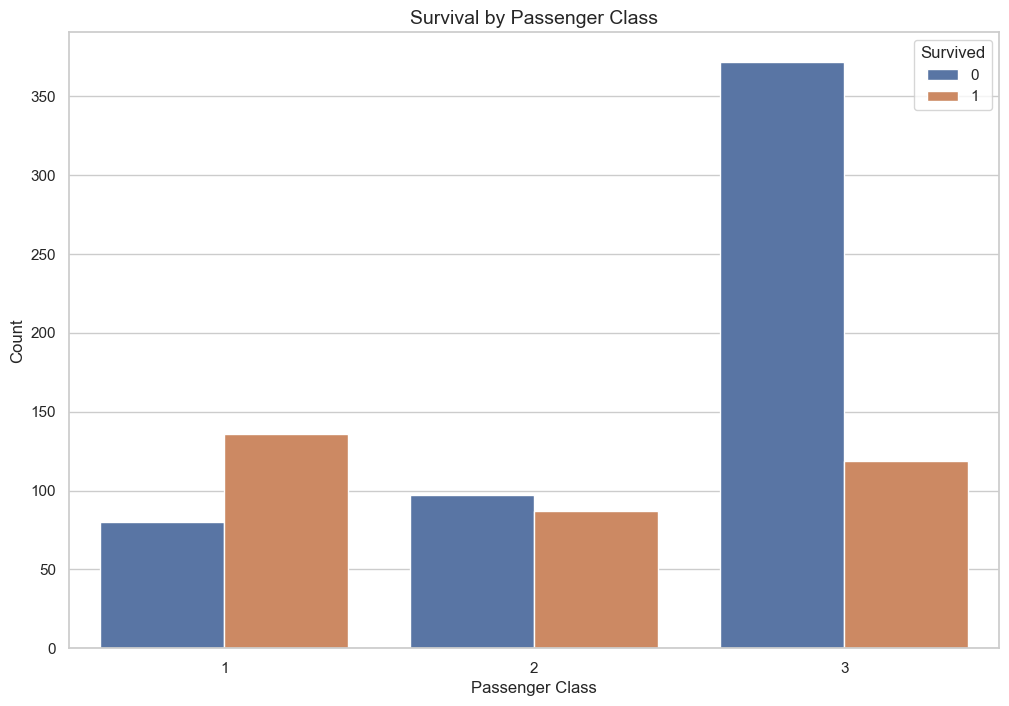

In [72]:
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('figures/survival_by_class.png')
plt.show()

Calculate survival rates by class

In [74]:
pclass_survival = train_data.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rates by passenger class:")
print(pclass_survival)


Survival rates by passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


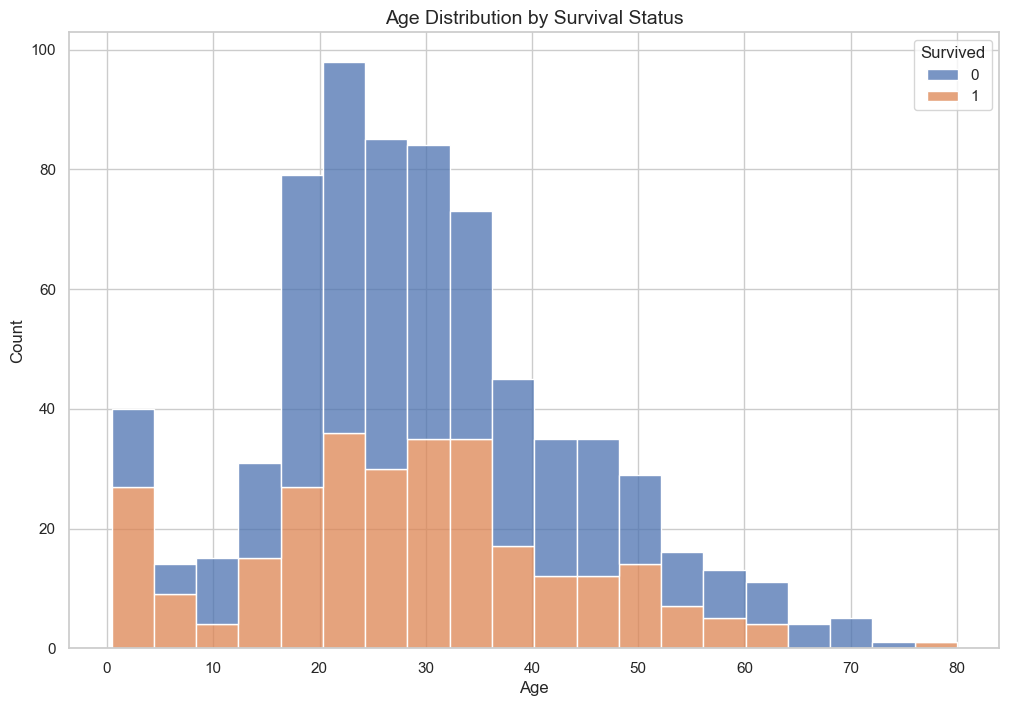

In [75]:
plt.figure()
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('figures/age_distribution.png')
plt.show()

Survival by port of embarkation

In [77]:
embarked_survival = train_data.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival rates by port of embarkation:")
print(embarked_survival)


Survival rates by port of embarkation:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


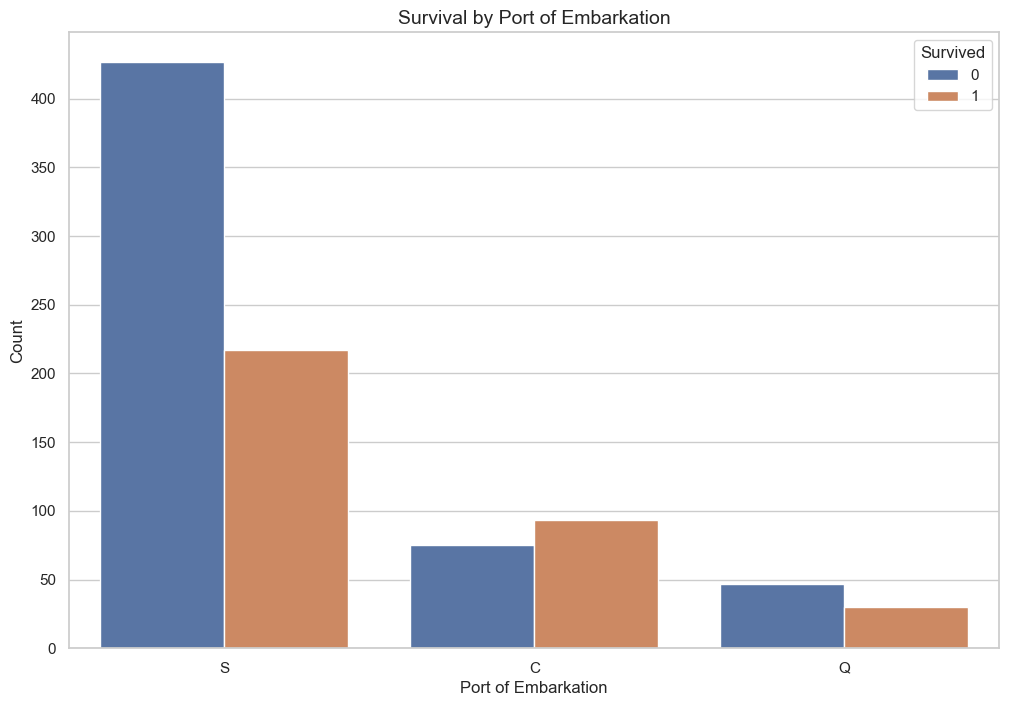

In [78]:
plt.figure()
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival by Port of Embarkation', fontsize=14)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('figures/survival_by_embarked.png')
plt.show()

Survival by family size (SibSp + Parch)

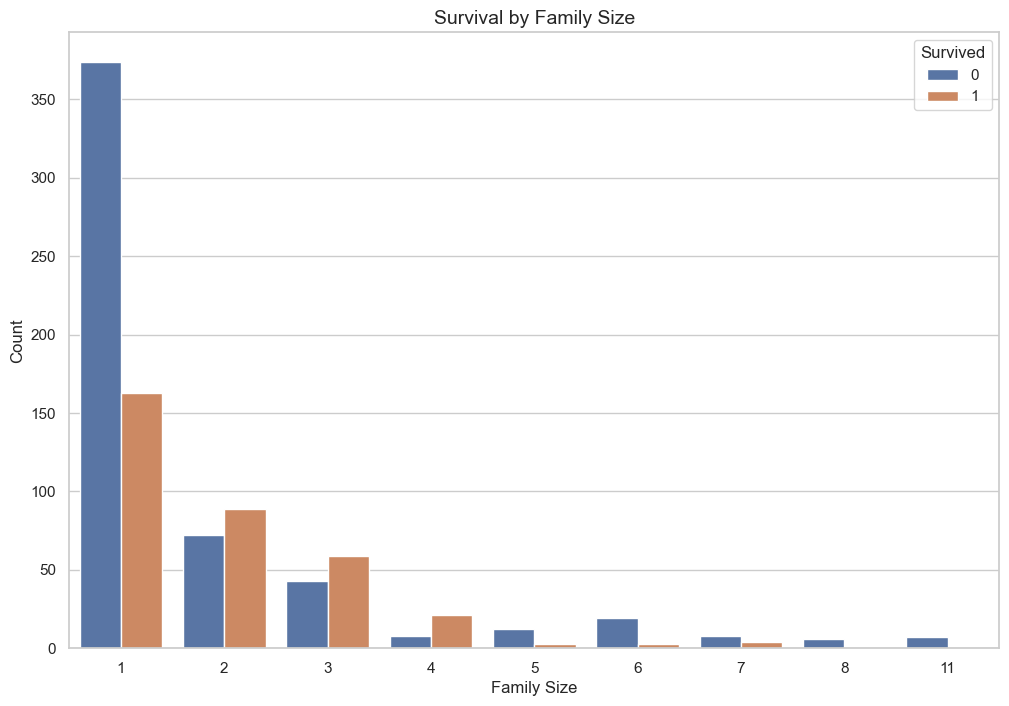

In [80]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1  # +1 for the passenger
plt.figure()
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.title('Survival by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('figures/survival_by_family_size.png')
plt.show()

Correlation matrix for numerical features

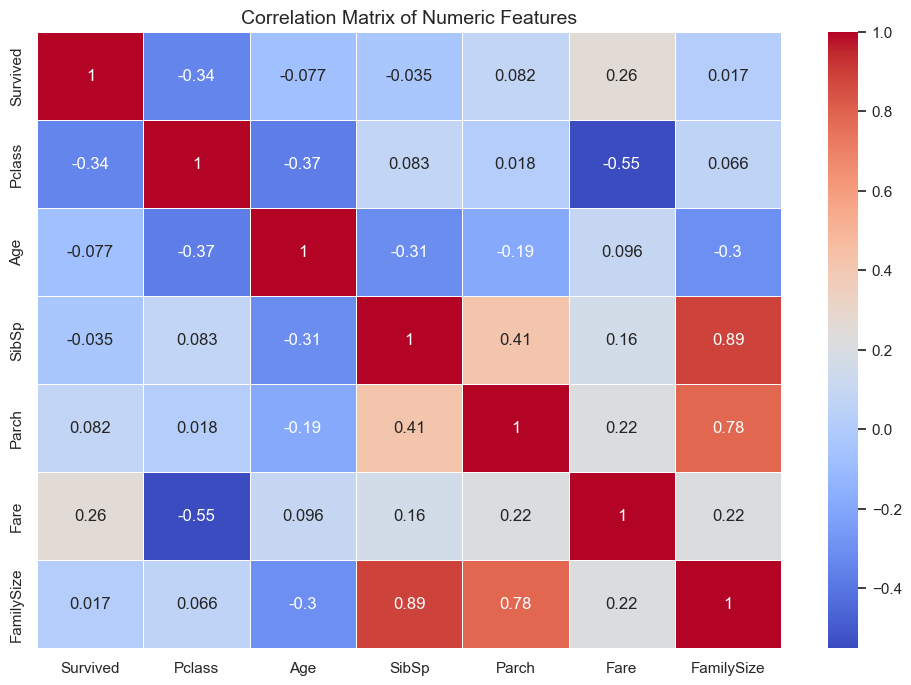

In [82]:
plt.figure()
numeric_data = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.savefig('figures/correlation_matrix.png')
plt.show()

### 2. Data Preprocessing and Feature Engineering

Combine datasets for consistent preprocessing

In [85]:
train_data['is_train'] = 1
test_data['is_train'] = 0
test_data['Survived'] = None
combined_data = pd.concat([train_data, test_data], axis=0)

Extract titles from names

In [87]:
combined_data['Title'] = combined_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("\nTitle counts:")
print(combined_data['Title'].value_counts())


Title counts:
Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64


Group rare titles

In [89]:
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Rare",
    "Rev": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Mlle": "Miss",
    "Countess": "Rare",
    "Ms": "Miss",
    "Lady": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Dona": "Rare",
    "Mme": "Mrs",
    "Capt": "Rare",
    "Sir": "Rare"
}

In [90]:
combined_data['Title'] = combined_data['Title'].map(title_mapping)
print("\nGrouped title counts:")
print(combined_data['Title'].value_counts())


Grouped title counts:
Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64


In [91]:
if 'FamilySize' not in combined_data.columns:
    combined_data['FamilySize'] = combined_data['SibSp'] + combined_data['Parch'] + 1

Create a feature for passengers traveling alone

In [93]:
combined_data['IsAlone'] = 0
combined_data.loc[combined_data['FamilySize'] == 1, 'IsAlone'] = 1

Create family size categories

In [95]:
combined_data['FamilySizeCategory'] = pd.cut(
    combined_data['FamilySize'],
    bins=[0, 1, 4, 11],
    labels=['Alone', 'Small', 'Large']
)

Filling missing ages with median age by title

In [97]:
for title in combined_data['Title'].unique():
    title_age_median = combined_data.loc[
        (combined_data['Title'] == title) & (combined_data['Age'].notna()),
        'Age'
    ].median()

    combined_data.loc[
        (combined_data['Age'].isna()) & (combined_data['Title'] == title),
        'Age'
    ] = title_age_median

Create age groups

In [99]:
combined_data['AgeGroup'] = pd.cut(
    combined_data['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
)

Fill missing Embarked values with most common (S)

In [101]:
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)

Fill missing Fare values with median by Pclass

In [103]:
for pclass in combined_data['Pclass'].unique():
    pclass_fare_median = combined_data.loc[
        (combined_data['Pclass'] == pclass) & (combined_data['Fare'].notna()),
        'Fare'
    ].median()

    combined_data.loc[
        (combined_data['Fare'].isna()) & (combined_data['Pclass'] == pclass),
        'Fare'
    ] = pclass_fare_median

Create fare categories

In [105]:
combined_data['FareCategory'] = pd.qcut(
    combined_data['Fare'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

Convert categorical features to one-hot encoding

In [107]:
categorical_features = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FamilySizeCategory', 'FareCategory']
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_features, drop_first=True)

In [108]:
print("\nMissing values after preprocessing:")
print(combined_data_encoded.isnull().sum().sum())


Missing values after preprocessing:
1850


In [109]:
train_processed = combined_data_encoded[combined_data_encoded['is_train'] == 1].drop('is_train', axis=1)
test_processed = combined_data_encoded[combined_data_encoded['is_train'] == 0].drop(['is_train', 'Survived'], axis=1)

In [110]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']
X_train = train_processed.drop(drop_columns, axis=1)
y_train = train_processed['Survived']
y_train = y_train.astype(int)
X_test = test_processed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [111]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [112]:
print(f"\nTraining data shape after preprocessing: {X_train.shape}")
print(f"Test data shape after preprocessing: {X_test.shape}")


Training data shape after preprocessing: (891, 23)
Test data shape after preprocessing: (418, 23)


### 3. Model Building and Evaluation

Split training data into train and validation sets

Create a dictionary of models to evaluate

In [116]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}
# Evaluate each model with cross-validation
cv_results = {}
for name, model in models.items():
    # Fit on the training split
    model.fit(X_train_split, y_train_split)
    
    # Predict on validation set
    val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    
    # Cross-validation on full training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'validation_accuracy': val_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # Print results
    print(f"\n{name}:")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(f"  Cross-Validation: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, val_pred))
    print("-" * 60)

# Visualize model performance
model_names = list(cv_results.keys())
cv_means = [cv_results[name]['cv_mean'] for name in model_names]
cv_stds = [cv_results[name]['cv_std'] for name in model_names]


Logistic Regression:
  Validation Accuracy: 0.8436
  Cross-Validation: 0.8271 ± 0.0197

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
[[98 12]
 [16 53]]
------------------------------------------------------------

Decision Tree:
  Validation Accuracy: 0.7765
  Cross-Validation: 0.7778 ± 0.0224

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
[[89 21]
 [1

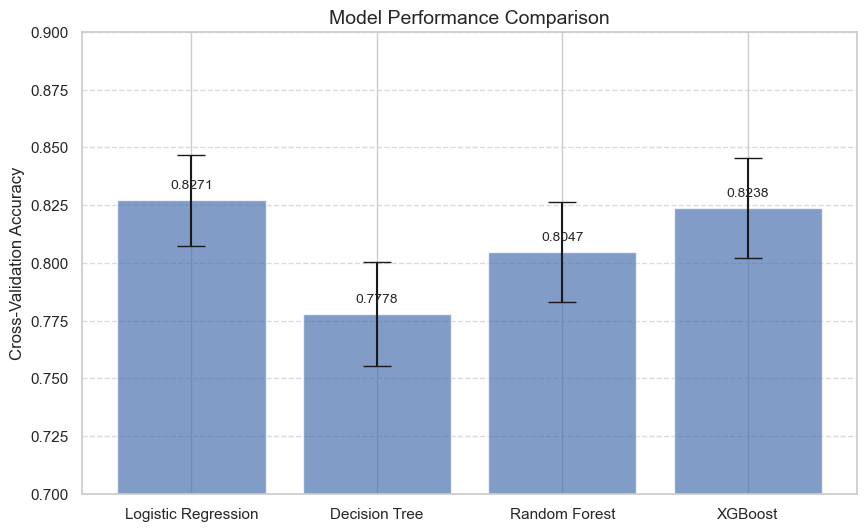

In [117]:
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, cv_means, yerr=cv_stds, capsize=10, alpha=0.7)
plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.ylim(0.7, 0.9)  # Adjust as needed based on your results
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', fontsize=10)

In [118]:
plt.savefig('figures/model_comparison.png')

<Figure size 1200x800 with 0 Axes>

In [119]:
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

In [120]:
print("\nPerforming hyperparameter tuning for Random Forest...")


Performing hyperparameter tuning for Random Forest...


In [121]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    small_param_grid,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

In [122]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [123]:
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.8316


Train the final model with best parameters

In [125]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [126]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

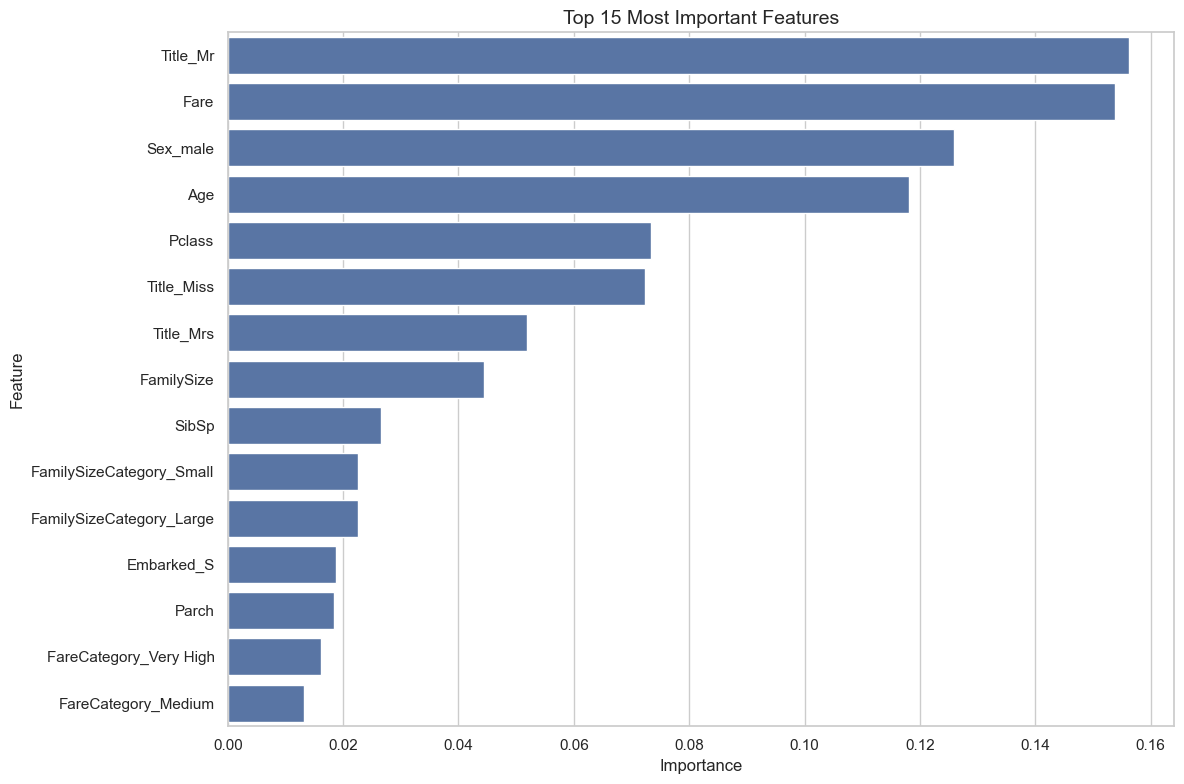

In [127]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.tight_layout()
plt.savefig('figures/feature_importance.png')

### Model Ensemble

In [129]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
xgb = XGBClassifier(random_state=42)

In [130]:
ensemble = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)

In [131]:
cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nEnsemble Model - CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Ensemble Model - CV Accuracy: 0.8350 ± 0.0204


### 4. Predictions & Submission

In [133]:
predictions = best_rf.predict(X_test)

In [134]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions.astype(int)
})

In [135]:
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created: submission.csv")
print(submission.head())


Submission file created: submission.csv
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
